In [1]:
%matplotlib widget

import numpy as np
import sys
sys.path.append('src/')

import matplotlib.pyplot as plt
import coordinates as coord
import kepler as kpl

## Pset 5

### Useful Constants

In [2]:
pi      = np.pi
deg2rad = pi / 180.0
rad2deg = 180.0 / pi

min2rad = deg2rad / 60.0
rad2min = rad2deg * 60.0

sec2rad = min2rad / 60.0
rad2sec = rad2min * 60.0

day2sec = 86400.0

AU2meter = 1.496e11 
km2meter = 1000

G = 6.6743e-11
m_sun = 1.989e30
m_E = 5.97219e24

r_E = 6378e3 # m

### 1 a) UFO Calculations - semi-major axis

In [3]:
x      = -5.654521158368091E+07 * km2meter
y      = -4.141584370434758E+09 * km2meter
z      = -2.516187548793956E+09 * km2meter
v_x    = 1.894813995825346E+00 * km2meter
v_y    = -2.900052383928433E+01 * km2meter
v_z    = -1.587424775496980E+01 * km2meter
mu_sun = G * m_sun

r = np.sqrt(x**2 + y**2 + z**2)
v = np.sqrt(v_x**2 + v_y**2 + v_z**2)

# from vis-viva law, find semi-major axis
a = 1 / (2/r - ((v**2)/mu_sun))

print(f"Semi-major axis: {a} (m)")

Semi-major axis: -127421993657.05507 (m)


### 1 b) Eccentricity

In [4]:

# find areal velocity vector
_h = np.array([y * v_z - z * v_y, 
               z * v_x - x * v_z, 
               x * v_y - y * v_x])

h = np.linalg.norm(_h)

# semi-latus rectum
p = (h**2) / mu_sun

# compute eccentricity
e = np.sqrt(1 - p/a)

print(f"Orbit's eccentricity: {e}")

Orbit's eccentricity: 3.3623797228049273


### 1 d) Object Classification

In [5]:
print(f"Object Velocity: {v / 1000} km/s")
print(f"Object distance: {r / AU2meter} AU")

Object Velocity: 33.11513920879449 km/s
Object distance: 32.395394539428736 AU


## Problem 2

In [6]:
data = np.loadtxt('/workspaces/AA179/pset5_input.txt', usecols = (1,2,3,4,5,6), delimiter = ',')
x = data[:,0] * 1e3 # we multiply by 1e3 to get meters/sec
y = data[:,1] * 1e3
z = data[:,2] * 1e3
vx = data[:,3] * 1e3
vy = data[:,4] * 1e3
vz = data[:,5] * 1e3

t = np.arange(0, 60, 1)
mu_sun = G * m_sun


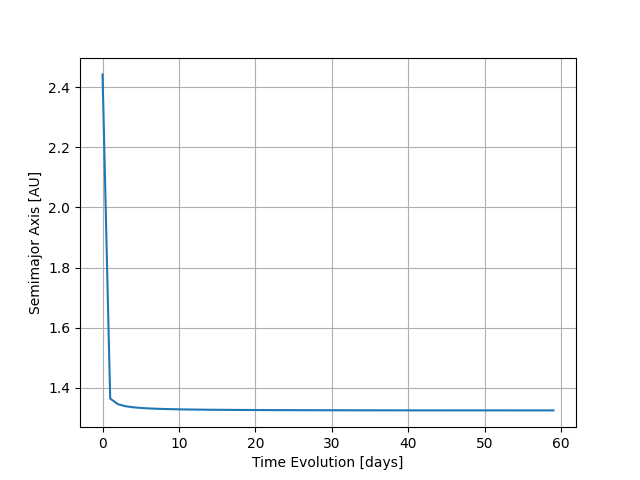

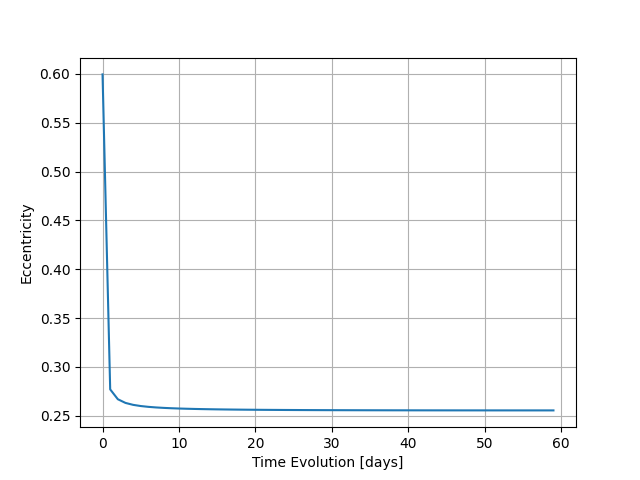

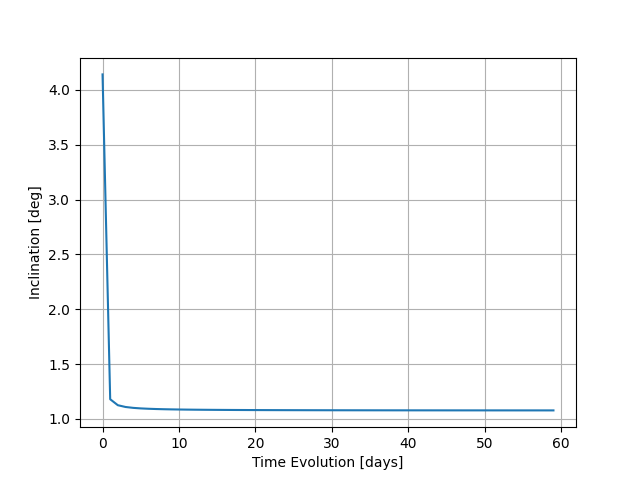

In [7]:
a_all = []
e_all = []
i_all = []

for xi, yi, zi, vxi, vyi, vzi in zip(x, y, z, vx, vy, vz):
    a, e, i, w, W, M = kpl.coord2elem(xi, yi, zi, vxi, vyi, vzi, mu_sun)
    a_all.append(a)
    e_all.append(e)
    i_all.append(np.degrees(i))  # Convert radians to degrees for inclination

plt.figure()
plt.plot(t, np.array(a_all) / AU2meter)
plt.xlabel("Time Evolution [days]")
plt.ylabel("Semimajor Axis [AU]")
plt.grid(True)
plt.show()

plt.figure()
plt.plot(t, e_all)
plt.xlabel("Time Evolution [days]")
plt.ylabel("Eccentricity")
plt.grid(True)
plt.show()

plt.figure()
plt.plot(t, i_all)
plt.xlabel("Time Evolution [days]")
plt.ylabel("Inclination [deg]")
plt.grid(True)
plt.show()

### 2b pericenter and apocenter at last time step

In [10]:
a_last = a_all[-1]
e_last = e_all[-1]

r_p_last = a_last * (1 - e_last)
r_a_last = a_last * (1 + e_last)

print(f"Pericenter at last time step: {r_p_last / AU2meter} \n")
print(f"Apocenter at last time step: {r_a_last / AU2meter}")

Pericenter at last time step: 0.9859473408588573 

Apocenter at last time step: 1.662868081542773


### 2c Identification

In [11]:
print(f"Semi-major axis of orbit: {a_last}")
print(f"Eccentricity of orbit: {e_last}")
print(f"Inclination of orbit: {i_all[-1]}")

Semi-major axis of orbit: 198131393595.64194
Eccentricity of orbit: 0.25555602514204817
Inclination of orbit: 1.077540154767202
